# Range expansion shifts clonal interference patterns in evolving populations

Here we present code to run simulations and generate the figures seen in our pre-print: __Nikhil Krishnan and Jacob G. Scott. Range expansion shifts clonal interference patterns in evolving populations. bioRxiv (2019) 794867__  

## Prerequisites

In [1]:
from scipy.integrate import odeint
import numpy as np
from numpy import gradient as grad
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import SymLogNorm, LogNorm
import matplotlib.pylab as pl
import pandas as pd
import seaborn as sns
from scipy.integrate import odeint
import scipy.integrate as integrate
from diffusion_growth_funcs import*
import tqdm

##for improved readability of markdown
#import warnings
#warnings.filterwarnings('ignore')


## Box 1 Figures

### Demonstrating solutions of fisher equation over parameter space or r and D

In [5]:
###generate standing waves solution of Fisher equation
### varying initial conditions chosen for best aesthetic result of each figure
stnd_r = odeint(standing_wave,[1,-.09],np.linspace(0,99,100),args=(1,1))[:,0]
stnd_D = odeint(standing_wave,[1,-.01],np.linspace(0,99,100),args=(1,1))[:,0]

In [6]:
### growth rates for which Fisher wave will be solved through time
rs= [1,2,3,4,5]  
r_waves = []
t = np.linspace(0,5,100) 
dt = t[1]-t[0]
t0 = 30 

##solve Fisher equation through time using standing wave as initial wave
for r in rs:
    r_waves.append(odeint(simple_fisher, stnd_r, t, args = (0,r,dt))[t0,:])

Text(0.5,0,'x')

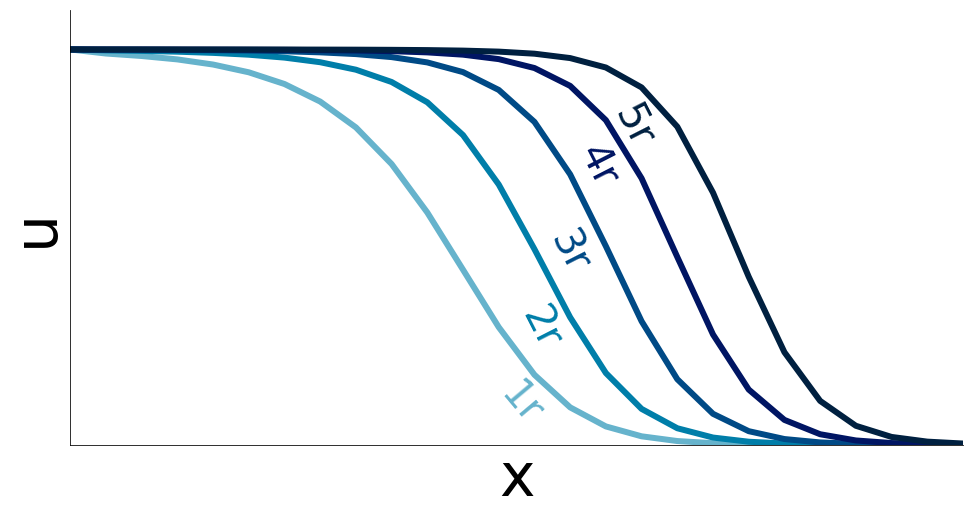

In [7]:
###Box 1 Figure (left)

##i.e. alpha = 0 
box_c = (0.968, 0.940, 0.968,0)

fig, ax  = plt.subplots(figsize=(16,8),sharey=True,facecolor=box_c)

colors = pl.cm.ocean(np.linspace(.8,.25,5))


for r in range(len(r_waves)):
    ax.plot(r_waves[r],color=colors[r],lw=6)

    
ax.set_facecolor(box_c)

##axis labels and line label font sizes
fsa=40
fsl=60

#line labels
ax.text(11.8,.1,'%.0fr' % (rs[0]) ,color=colors[0],fontsize=fsa,rotation =-50)
ax.text(12.4,.29,'%.0fr' % (rs[1]),color=colors[1],fontsize=fsa,rotation =-63)
ax.text(13.2,.48,'%.0fr' % (rs[2]),color=colors[2],fontsize=fsa,rotation =-63)
ax.text(14,.7,'%.0fr' % (rs[3]),color=colors[3],fontsize=fsa,rotation =-63)
ax.text(15,.8,'%.0fr' % (rs[4]),color=colors[4],fontsize=fsa,rotation =-63)

ax.set_ylim(0,1.1)   
ax.set_xlim(0,25)
ax.set_xticks([])
ax.set_yticks([])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_ylabel('u',fontsize=fsl)
ax.set_xlabel('x',fontsize=fsl)



#plt.savefig('fisher_r.pdf',facecolor=fig.get_facecolor(), edgecolor='none')

In [8]:
### Diffusion constant  for which Fisher wave will be solved through time
Ds= [.01,.05,.09,.13,.17]
D_waves = []
t = np.linspace(0,5,100)
dt = t[1]-t[0]
t0 = 20

##solve Fisher equation through time using standing wave as initial wave
for D in Ds:
    D_waves.append(odeint(simple_fisher, stnd_D, t, args = (D,5,dt))[t0,:])

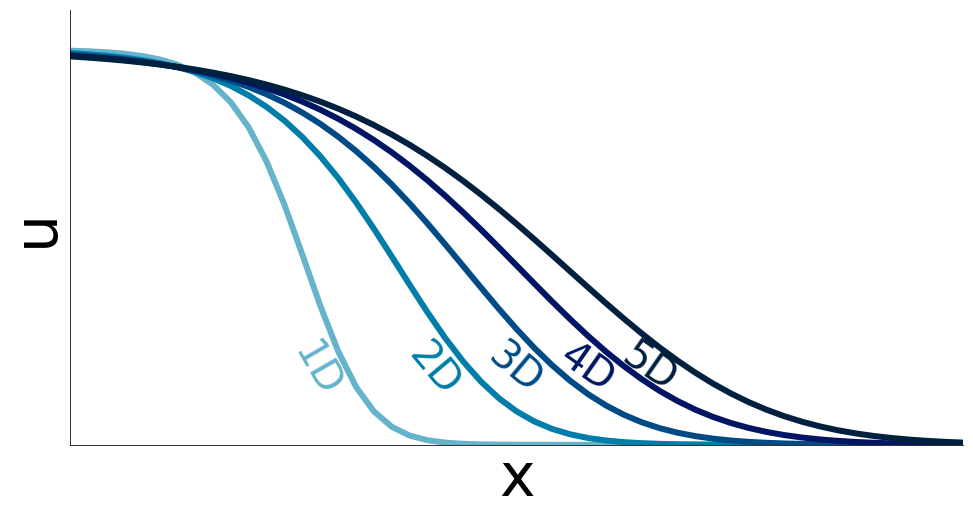

In [442]:
###Box 1 Figure (right)

##i.e. alpha = 0 
box_c = (0.968, 0.940, 0.968,0)

fig, ax  = plt.subplots(figsize=(16,8),sharey=True,facecolor=box_c)
colors = pl.cm.ocean(np.linspace(.8,.25,5))


for D in range(len(D_waves)):
    ax.plot(D_waves[D],color=colors[D],lw=6)
    
ax.set_facecolor(box_c)

##axis labels and line label font sizes
fsa=40
fsl=60

#line labels
ax.text(22,.2,'%.0fD' % (1) ,color=colors[0],fontsize=fsa,rotation=-60)
ax.text(28.5,.2,'%.0fD' % (2),color=colors[1],fontsize=fsa,rotation=-50)
ax.text(33,.2,'%.0fD' % (3),color=colors[2],fontsize=fsa,rotation=-40)
ax.text(37,.2,'%.0fD' % (4),color=colors[3],fontsize=fsa,rotation=-35)
ax.text(40.5,.2,'%.0fD' % (5),color=colors[4],fontsize=fsa,rotation=-35)

ax.set_ylim(0,1.1)   
ax.set_xticks([])
ax.set_yticks([])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel('u',fontsize=fsl)
ax.set_xlabel('x',fontsize=fsl)
ax.set_xlim(10,60)

#plt.savefig('fisher_D.pdf',facecolor=fig.get_facecolor(), edgecolor='none')

## Box 2 Figures

### Clonal interference with varying mutation-selection in a well mixed model

Text(225,-0.05,'2')

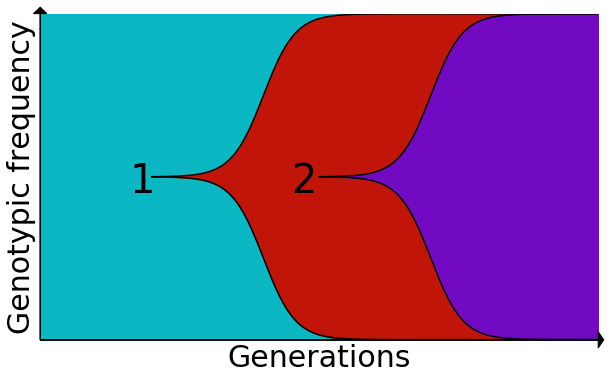

In [9]:
##Box 2 Figure (left)

fig, ax = plt.subplots(figsize=(10,6),facecolor=box_c)

##assign colors
wt= [sns.hls_palette(8, l=.4, s=.9)[4]]
mut = [sns.hls_palette(8, l=.4, s=.9)[0]]
mut1 = [sns.hls_palette(8, l=.4, s=.9)[-2]]


##clone 0
ax.fill_between(np.linspace(0,500,500),.5,-.5,color = wt)

##clone 1
clone = (.5/(1+np.exp(-.07*np.linspace(0,400,400)+7))) - .5/(1+np.exp(7))
clone_ = -clone
ax.plot(np.linspace(100,500,400),clone,'k')
ax.plot(np.linspace(100,500,400),clone_,'k')
ax.fill_between(np.linspace(100,500,400),clone,clone_,color = mut) ##fill boundaries for first mutant 

##clone 2 
clone2 = (.5/(1+np.exp(-.07*np.linspace(0,250,250)+7))) - .5/(1+np.exp(7))
clone2_ = -clone2
ax.fill_between(np.linspace(250,500,250),clone2,clone2_,color = mut1) ##fill boundaries for second mutant 
ax.plot(np.linspace(250,500,250),clone2,'k')
ax.plot(np.linspace(250,500,250),clone2_,'k')

##adjust plot
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(-.5,.5)
ax.set_xlim(0,500)
ax.set_yticks([])
ax.set_xticks([])
ax.set_ylabel('Genotypic frequency',fontsize=30)
ax.set_xlabel('Generations',fontsize=30)
ax.text(80,-.05,'1',fontsize=40)
ax.text(225,-.05,'2',fontsize=40)

##add arrows on axes
ax.arrow(0,-.5,500,0,head_width =.05,head_length= 5,clip_on=False,color = 'k')
ax.arrow(0,-.5,0,1,head_width =12,head_length= .02,clip_on=False,color = 'k')

#plt.savefig('SSWM.pdf', facecolor=fig.get_facecolor(), edgecolor='none'  )

Text(0.5,0,'Generations')

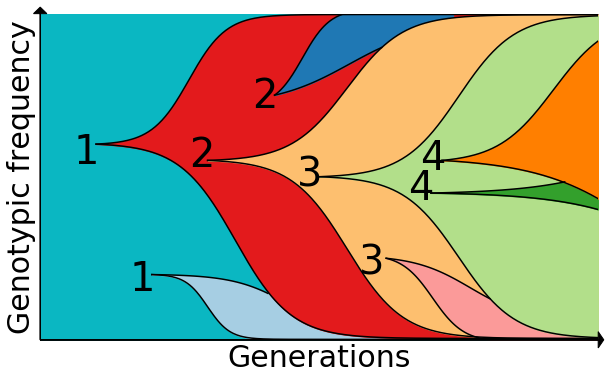

In [13]:
##Box 2 Figure (left)

fig, ax = plt.subplots(figsize=(10,6),facecolor=box_c)

##mutant colors 
pal = sns.color_palette("Paired",10) ##mutant colors
ls = 40 ##line label font size 


#clone 0
ax.fill_between(np.linspace(0,500,500),.5,-.5,color = wt)


#clone 1b
clone1b = -((.2/(1+np.exp(-.04*np.linspace(0,400,400)+5))) - (.2/(1+np.exp(5)))+.3)
clone1b_ = -((.2/(1+np.exp(-.1*np.linspace(0,400,400)+5))) - (.2/(1+np.exp(5)))+.3)
ax.fill_between(np.linspace(100,500,400),clone1b,clone1b_,color = [pal[0]])
ax.plot(np.linspace(100,204,104),clone1b[0:104],'k')
ax.plot(np.linspace(100,500,400),clone1b_,'k')
ax.text(80,-.35,'1',fontsize=ls) ##label 

#clone 1a
clone1a = (.4/(1+np.exp(-.06*np.linspace(0,450,450)+5))) - .4/(1+np.exp(5)) +.1
clone1a_ = -((.6/(1+np.exp(-.04*np.linspace(0,450,450)+5))) - .6/(1+np.exp(5)) -.1)
ax.fill_between(np.linspace(50,500,450),clone1a,clone1a_,color = [pal[5]])
ax.plot(np.linspace(50,500,450),clone1a,'k')
ax.plot(np.linspace(50,500,450),clone1a_,'k')
ax.text(30,.04,'1',fontsize=ls) ##label


#clone 2b
clone2b = (.30/(1+np.exp(-.08*np.linspace(0,160,160)+2))) - (.30/(1+np.exp(2)))+.25
clone2b_ =(.25/(1+np.exp(-.03*np.linspace(0,160,160)+2))) - (.25/(1+np.exp(2)))+.25
ax.fill_between(np.linspace(210,370,160),clone2b_,clone2b,color = [pal[1]])
ax.plot(np.linspace(210,370,160),clone2b,'k')
ax.plot(np.linspace(210,306,96),clone2b_[0:96],'k')
ax.text(190,.21,'2',fontsize=ls) ##label 

#clone 2a
clone2a = (.45/(1+np.exp(-.04*np.linspace(0,350,350)+5))) - .45/(1+np.exp(5)) +.05
clone2a_ = -((.55/(1+np.exp(-.04*np.linspace(0,350,350)+5))) - .55/(1+np.exp(5)) -.05)
ax.fill_between(np.linspace(150,500,350),clone2a,clone2a_,color = [pal[6]])
ax.plot(np.linspace(150,500,350),clone2a,'k')
ax.plot(np.linspace(150,500,350),clone2a_,'k')
ax.text(133,.03,'2',fontsize=ls) ##label 


#clone 3b
clone3b = - ((.27/(1+np.exp(-.07*np.linspace(0,190,190)+3))) - (.27/(1+np.exp(3)))+.25)
clone3b_ = -((.20/(1+np.exp(-.04*np.linspace(0,190,190)+3))) - (.20/(1+np.exp(3)))+.25)
ax.fill_between(np.linspace(310,500,190),clone3b,clone3b_,color =[pal[4]])
ax.plot(np.linspace(310,400,93),clone3b[0:93],'k')
ax.plot(np.linspace(310,403,93),clone3b_[0:93],'k')
ax.text(286,-.3,'3',fontsize=ls) ##label 

#clone 3a
clone3a = (.5/(1+np.exp(-.04*np.linspace(0,250,250)+5))) - .5/(1+np.exp(5))
clone3a_ = -clone3a
ax.fill_between(np.linspace(250,500,250),clone3a,clone3a_,color =[pal[2]])
ax.plot(np.linspace(250,500,250),clone3a,'k')
ax.plot(np.linspace(250,500,250),clone3a_,'k')
ax.text(230,-.03,'3',fontsize=ls) ##label 

#clone 4a
clone4a = (.55/(1+np.exp(-.02*np.linspace(0,150,150)+5))) - .55/(1+np.exp(5)) -.05
clone4a_ = -((.45/(1+np.exp(-.02*np.linspace(0,150,150)+5))) - .45/(1+np.exp(5)) +.05)
ax.fill_between(np.linspace(350,500,150),clone4a,clone4a_,color =[pal[3]])
ax.plot(np.linspace(350,470,120),clone4a[0:120],'k')
ax.plot(np.linspace(350,500,150),clone4a_,'k')
ax.text(340,.02,'4',fontsize=ls) ##label 

#clone 4b
clone4b = (.45/(1+np.exp(-.04*np.linspace(0,150,150)+4))) - .45/(1+np.exp(4)) +.05
clone4b_ = -((.55/(1+np.exp(-.02*np.linspace(0,150,150)+4))) - .55/(1+np.exp(4)) -.05)
ax.fill_between(np.linspace(360,510,150),clone4b,clone4b_,color =[pal[7]])
ax.plot(np.linspace(360,510,150),clone4b,'k')
ax.plot(np.linspace(360,510,150),clone4b_,'k')
ax.text(330,-.07,'4',fontsize=ls) ##label 


ax.plot()


##adjust plot 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(-.5,.5)
ax.set_xlim(0,500)
ax.set_yticks([])
##ax.set_yticklabels([1])
ax.set_xticks([])
ax.arrow(0,-.5,500,0,head_width =.05,head_length= 5,clip_on=False,color = 'k')
ax.arrow(0,-.5,0,1,head_width =12,head_length= .02,clip_on=False,color = 'k')
ax.set_ylabel('Genotypic frequency',fontsize=30)
ax.set_xlabel('Generations',fontsize=30)



#plt.savefig('clonal_interference.pdf', facecolor=fig.get_facecolor(), edgecolor='none')

## Figure 1 

### Stochastic Fisher wave with a beneficial mutant 

In [2]:
##solve stochastic Fisher wave (Eqs 2,3 in pre-print) forward through time 
R= 100
t=np.linspace(0,1000,10000)
sim_sde = sde_model_solve_1mut(R=R, R_div=1, ##length of space through which the Fisher wave is simulate
                               c=.00281,c_0=.000035,c_1=.0028, ## Diffusion constant - in terms of Agar concentration (see Croze et al. 2016)
                               delta= 0,I = 0, K_x = 0, K_s = 0,N = .0, H=0,  ##advection parametr=ers - unused in this investigation
                               rw=.1,a = 1.5,mu = .0001, ## wild_type growh rate, selection coefficient (alpha in preprint), mutation rate
                               b0 = np.exp( -(np.linspace(0,R-1,R)**2)/(2**2)), ##'gaussian packet' of initial cells
                               s0 = np.full(R,1), ##initial substrate, for advenction - unused in this investigation
                               t = t,L_f=40,K=1*10**7) 

In [5]:
r_space= np.linspace(0,R-1,R)
t_graph = [1000,1200,1400,1600,1800] ## times to be graphed
x = []
xm = []
xm2 = []


##apppend times of interest
for t in t_graph:
    x.append(sim_sde[t][0:R]+sim_sde[t][R:2*R]) #+sim_sde[t][2*R:3*R]
    xm.append(sim_sde[t][R:2*R]) #+sim_sde[t][2*R:3*R]
    #xm2.append(sim_sde[t][2*R:3*R]) 
    

In [6]:
##iniative, space time and concentraiton arrays
r = [np.linspace(0,R-1,R).tolist()]*len(t_graph)
t=  [[t]*R for t in t_graph]
c= [[t]*R for t in t_graph]

In [7]:
##iniate dataframe 
diff_rep = {}
diff_rep['x'] = np.array(x).flatten()
diff_rep['xm'] = np.array(xm).flatten()
#diff_rep['xm2'] = np.array(xm2).flatten()
diff_rep['r'] = np.array(r).flatten()
diff_rep['t'] = np.array(t).flatten()
df = pd.DataFrame(diff_rep)

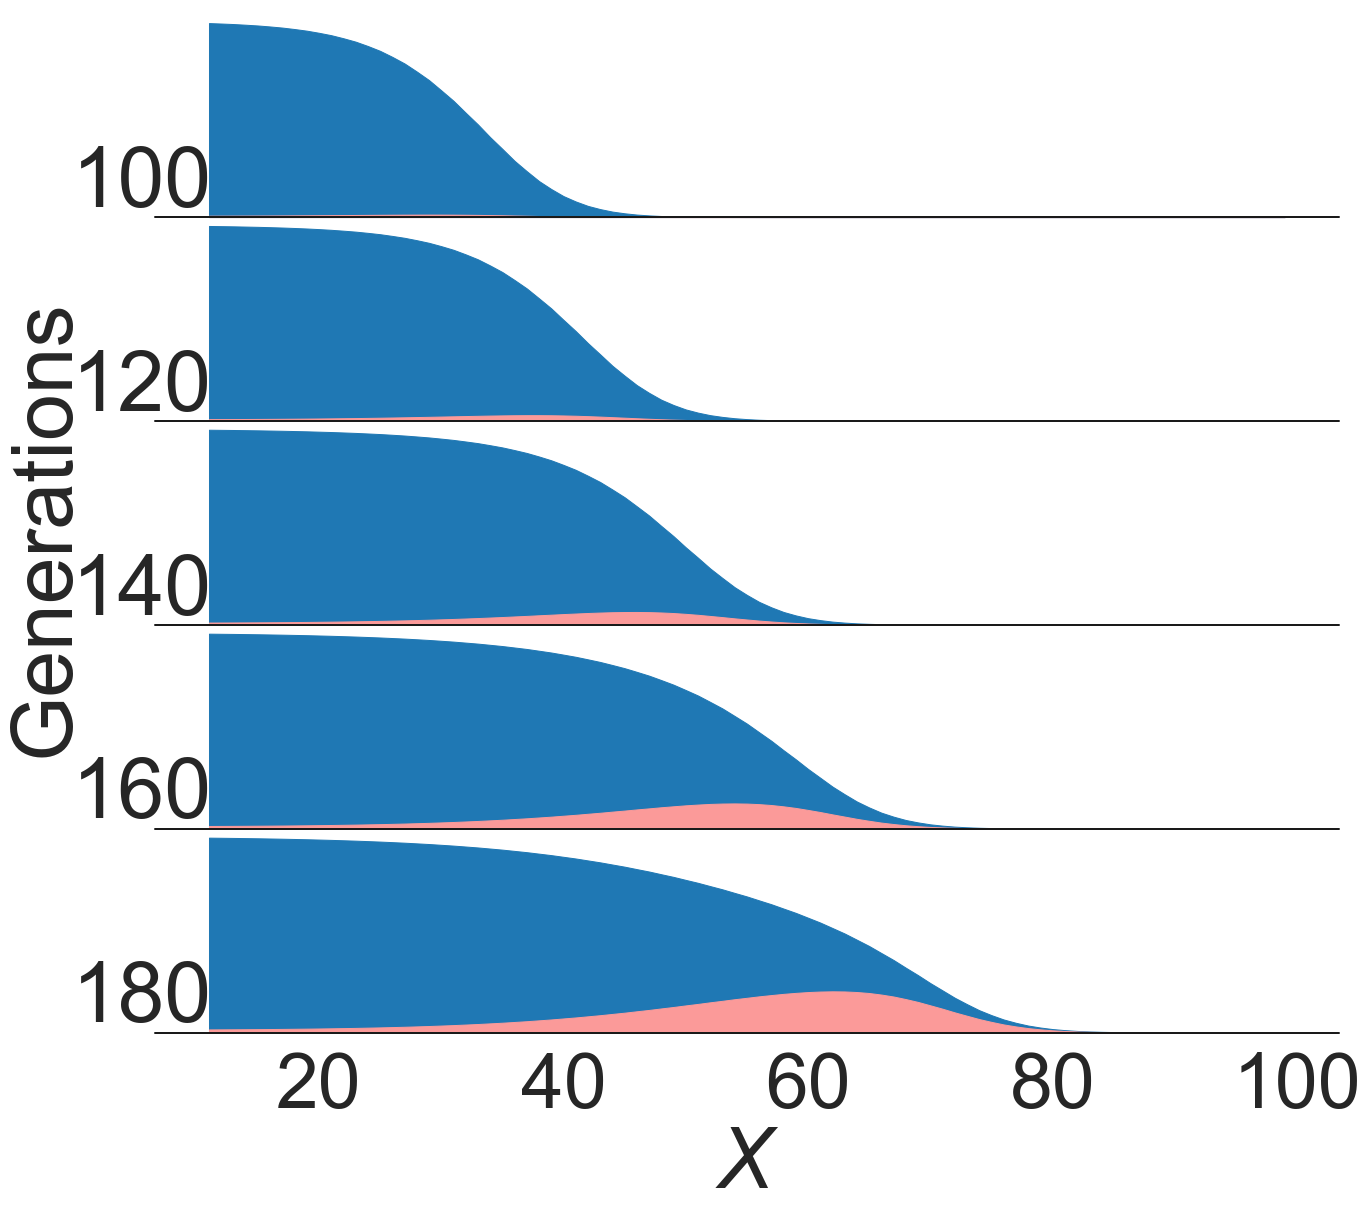

In [8]:
## Figure 1a
##code adapted from :  https://seaborn.pydata.org/examples/kde_ridgeplot.html
##restrict to space of inserest (in lieu of  plt.xlim function)
df= df[df['r']<100][df['r']>10]


sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0),},font_scale=7)

# Initialize the FacetGrid objects
pal = sns.color_palette("Paired",10)
g = sns.FacetGrid(df, row="t",hue= "t" ,aspect=5, height=4 )

#plot data 
g.map(plt.fill_between,"r","x",clip_on=False,color = pal[1], label = 'Wild-type')
g.map(plt.fill_between,"r","xm",clip_on=False,color = pal[4], label = 'Mutant')
g.map(plt.axhline,y=0,lw=2,clip_on=False,color='k')


# Define and use a simple function to label the plot in axes coordinates
def label(x,color,label):
    ax = plt.gca()
    ax.text(-.07, .2, int(int(label)/10),
            ha="left", va="center", transform=ax.transAxes)


#adjust plot 
g.map(label,'x')
g.fig.subplots_adjust(hspace=-.05)
g.set_titles("")
g.set(yticks=[])
g.set_ylabels("")
g.despine(bottom=True, left=True)
ax = g.facet_axis(-3,0)
ax.set_ylabel('Generations', labelpad=70)
ax = g.facet_axis(-1,0)
ax.set_xlabel('$X$')


##g.savefig('diff_rep.pdf')

### local mutant fixation time at wave tip over parameter space 

In [9]:
#### solve fisher equation,  measure time for front to fix with 1 mutant

###equation parameters
R= 5000
R_div = 1
c=.0028
c_0=.000035
c_1=.0028
delta= 0
I = 0
K_x = 0
K_s = 0
N = 0
H = 0
rw = .1
a = 1.3
K= (1*10**7)
b0 = np.exp( -(np.linspace(0,R-1,R)**2)/(2**2))
s0 = np.full(R,1)
t = t=np.linspace(0,100,1000)

bm0 = np.zeros((R-1)*R_div+1)
z  = np.concatenate([b0,bm0,s0])##initial conditions for wild type (gaussian packet), mutant (0), and substrate (1)


cs = [.0015,.00275,.00279,.00281] ## diffusion constants in terms of agar concentration
mus = np.array([.000001,.00001,.0001,.001]) ##mutation rates (Ub inpre print)
ss = np.array([1.5,3,4.5,6]) ## selection coefcients (alphha in preprint)
ft_param = []
results_param = []
for c in cs:
    for mu in mus:
        for a in ss:
            results = []
            results.append(z)
            dt = .1

            fixed = False
            t= 0
            fix_times=[]
            
            ##solve for standing wave which will define wave front 
            stand = odeint(standing_wave,[1,-.01],np.linspace(0,99,100),args=(M_A(c,.000035,.0028,1),rw))
            L_f = np.where((stand[:,0]*K)>1)[0][-1]
            fb_1 =np.zeros(L_f)==1
            
            
            ### run simulation until the wave front fixes 
            while not fixed:
                results.append(results[-1] +dt*model_sde_1mut(results[-1], t,R,R_div,c,c_0,c_1,delta,I,K_x,K_s,N,H,rw,a,mu,K))
                results[-1][results[-1]< 0]= 0  
                #wild type and mutant waves 
                b = results[-1][0:R] 
                bm = results[-1][R:2*R]
                
                #end of wave front
                fe= np.where(((b+bm)*K)>1)[0][-1]
                
                if fe >=L_f:
                        #start of wave front
                    fs=fe-L_f


                    front_bools = ((b[fs:fe]*K)<1)
                    ##update fixation times  times
                    fix_times.append((fb_1^front_bools)*t)
                    fb_1 = front_bools
                    fixed = all(front_bools)



                t+=1
                #limit for how long simulation would run 
                if t ==15000:
                    fixed =True
                    
                
            ft =np.array(fix_times)
            ft_param.append(ft[:,:].max(axis=0))
            results_param.append(results)

In [94]:
##arange data in arrays 
ft=np.array(ft_param).flatten()
f0 =  np.array((ss.tolist())*16).flatten()
f =  np.array([[f0[i]]*len(ft[i]) for i in range(len(ft))]).flatten()
m0 = np.array([4*[i] for i in mus]*4).flatten()
m =  np.array([[m0[i]]*len(ft[i]) for i in range(len(ft))]).flatten()
c0 = np.array([16*[i] for i in cs]).flatten()
c =  np.array([[c0[i]]*len(ft[i]) for i in range(len(ft))]).flatten()

In [95]:
flatten = lambda l: [item for sublist in l for item in sublist]

In [96]:
#place data in dta frame
df=pd.DataFrame(dict(t = flatten(ft),f=flatten(f),m=flatten(m),c=flatten(c)))

In [97]:
##find minimum of data once normalized to the first position (x_f = 0) in the wave front for the purposes of scaling colormap 
mins = []
for f in df['f'].unique():
    for m in df['m'].unique():
        for c in df['c'].unique():
            row = df['t'][df['f'] == f][df['m'] == m][df['c'] == c]
            mins.append(row.min()/row.max())
            
min_norm = min(mins)

/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/nikhilkrishnan/anacon

/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/nikhilkrishnan/anacon

/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/nikhilkrishnan/anacon

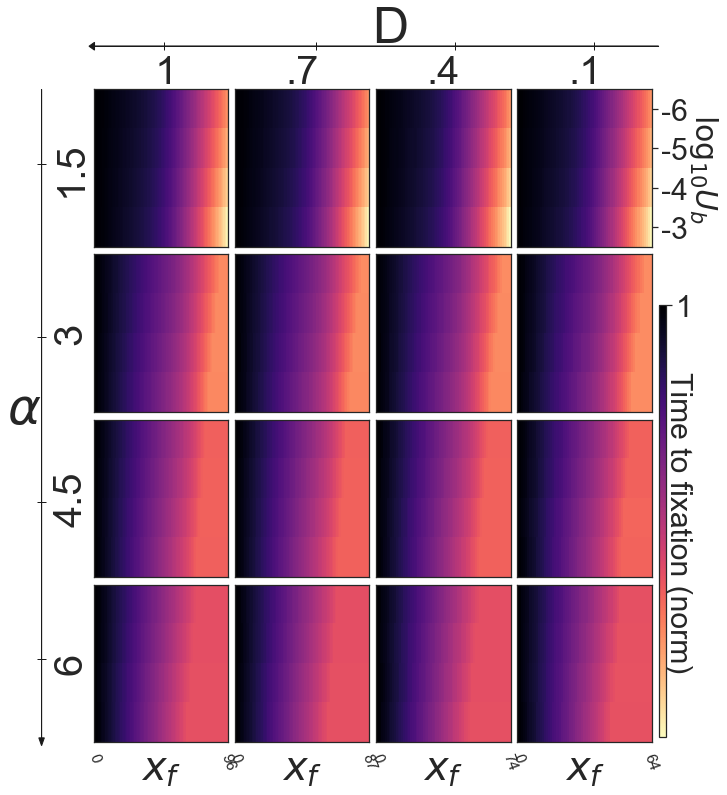

In [98]:
##Figure 1b 

fig,axs = plt.subplots(4,4,figsize =(10,12))
current_cmap = 'magma_r'
c_list = df['c'].unique().tolist()*4
f_list = np.array([4*[i] for i in df['f'].unique().tolist()]).flatten()
barc= 0 

for a,f in zip(axs, df['f'].unique()):
    for b,c in zip(range(len(a)),df['c'].unique()):
        dat= []
        for i in df['m'].unique():
            dat.append(df[df['f']==f][df['c']==c][df['m']==i]['t']/max(df[df['f']==f][df['c']==c][df['m']==i]['t']))
            a[b].imshow(dat,aspect="auto",vmin=min_norm,vmax=1,cmap=current_cmap)
        a[b].set_yticks([])
        a[b].set_xticks([])
        


plt.subplots_adjust(wspace=.05)
plt.subplots_adjust(hspace=.05)

##adjust color bar 
hm = a[b].imshow(dat,aspect="auto",vmin=min_norm,vmax=1,cmap=current_cmap)
cbar_ax = fig.add_axes([.91, 0.13, 0.01, 0.5])
cbar = fig.colorbar(hm, cax=cbar_ax,ticks=[round(min_norm,1)-.1, 1])
cbar.ax.tick_params(labelsize=30) 
cbar.set_label('Time to fixation (norm)', rotation=270,fontsize=30,labelpad=0)

###D sxis text and arrows 
axs[0,0].text(200,-1.7,'D',fontsize=50)
axs[0,0].set_title(' 1',fontsize=40)
axs[0,1].set_title('.7',fontsize=40)
axs[0,2].set_title('.4',fontsize=40)
axs[0,3].set_title('.1',fontsize=40)
axs[0,0].arrow(407,-1.60,-407,-0,head_width =.2,head_length= 4,clip_on=False,color = 'k')
axs[0,0].arrow(50,-1.5,0,-.2,head_width =0,head_length= 0,clip_on=False,color = 'k')
axs[0,0].arrow(160,-1.5,0,-.2,head_width =0,head_length= 0,clip_on=False,color = 'k')
axs[0,0].arrow(260,-1.5,0,-.2,head_width =0,head_length= 0,clip_on=False,color = 'k')
axs[0,0].arrow(360,-1.5,0,-.2,head_width =0,head_length= 0,clip_on=False,color = 'k')


## a axis text 
axs[0,0].text(-63,8,r'$\alpha$',fontsize=50)
axs[0,0].set_ylabel('1.5',fontsize=40)
axs[1,0].set_ylabel('3',fontsize=40)
axs[2,0].set_ylabel('4.5',fontsize=40)
axs[3,0].set_ylabel('6',fontsize=40)
axs[0,0].arrow(-38.2,-.5,0,16.5,head_width =4,head_length= .2,clip_on=False,color = 'k')
axs[0,0].arrow(-35.3,1.4,-6,0,head_width =0,head_length= 0,clip_on=False,color = 'k')
axs[0,0].arrow(-35.3,5.8,-6,0,head_width =0,head_length= 0,clip_on=False,color = 'k')
axs[0,0].arrow(-35.3,10,-6,0,head_width =0,head_length= 0,clip_on=False,color = 'k')
axs[0,0].arrow(-35.3,14,-6,0,head_width =0,head_length= 0,clip_on=False,color = 'k')

## U axis text 
axs[0,3].yaxis.tick_right()
axs[0,3].set_yticks([0,1,2,3])
axs[0,3].set_yticklabels([-6,-5,-4,-3],fontsize=30)
axs[0,3].set_ylabel(r'$\log_{10}U_b$',fontsize=30,rotation=270,labelpad=-170)

# bottom x tick and label axes text 
axs[-1,0].set_xticks([0,len(ft[0])-1])
axs[-1,0].set_xticklabels(['0','%d'% int(len(ft[0])-1) ],fontsize=15,rotation=290)
axs[-1,1].set_xticks([0,len(ft[17])-1])
axs[-1,1].set_xticklabels(['0','%d'% int(len(ft[17])-1) ],fontsize=15,rotation=290)
axs[-1,2].set_xticks([0,len(ft[33])-1])
axs[-1,2].set_xticklabels(['0','%d'% int(len(ft[33])-1) ],fontsize=15,rotation=290)
axs[-1,3].set_xticks([0,len(ft[49])-1])
axs[-1,3].set_xticklabels(['0','%d'% int(len(ft[49])-1) ],fontsize=15,rotation=290)
axs[-1,0].set_xlabel(r'$x_{f}$',fontsize=40,labelpad=-20)
axs[-1,1].set_xlabel(r'$x_{f}$',fontsize=40,labelpad=-20)
axs[-1,2].set_xlabel(r'$x_{f}$',fontsize=40,labelpad=-20)
axs[-1,3].set_xlabel(r'$x_{f}$',fontsize=40,labelpad=-20)


#plt.savefig('grid_norm.pdf')

### demonstrating clonal interference index w.r.t. position along wave profile 

In [65]:
R= 500
t=np.linspace(0,1000,10000)

K =1*10**7
a = 1.5
mu = .0001

sim_sde_2 = sde_model_solve_2mut(R=R, R_div=1,
                          c=.0028,c_0=.000035,c_1=.0028,
                          delta= 0,I = 0.1,
                          K_x = .53, K_s = 0,N = .0, H = 0,rw=rw,
                          a = a,mu = mu,
                          b0 = np.exp( -(np.linspace(0,R-1,R)**2)/(2**2)),
                                 s0 = np.full(R,1),t = t,L_f=L_f, K = K )

In [66]:
len(x[0])

100

In [67]:
a=a
D=M_A(.0028,.000035,.0028,1)
rw =rw
rm=rw*a
calc_fix_times = []
for i in range(L_f):
    ft = ((2*(L_f-i))/ ((2*((D*rm)**.5) - 2*((D*rw)**.5))))
    calc_fix_times.append(ft)
    

In [68]:
calc_fix_times;

In [69]:
s_prob = surf_prob_solve(stand[:,0],rw,rm,D,.01)

In [70]:
calc_est_times = 1/np.array(s_prob[:,0][:L_f]*stand[:,0][:L_f]*K*mu)

/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


In [71]:
len(calc_fix_times);

In [72]:
CII =np.log(calc_fix_times/calc_est_times)

/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [73]:
CII

array([       -inf,  9.0302277 ,  9.3480574 ,  9.43062401,  9.43945111,
        9.4200204 ,  9.38916133,  9.35376138,  9.31676002,  9.2794416 ,
        9.24238774,  9.20587654,  9.17006129,  9.1350396 ,  9.10087829,
        9.06762754,  9.035305  ,  9.00387907,  8.97324659,  8.94320744,
        8.91341416,  8.88333985,  8.85222298,  8.81903083,  8.78243501,
        8.74078937,  8.69214745,  8.63429554,  8.56481579,  8.48114885,
        8.3806866 ,  8.26083452,  8.11909556,  7.95314362,  7.76091206,
        7.54070003,  7.29130486,  7.01216702,  6.70349941,  6.36635711,
        6.00261051,  5.61480323,  5.20590936,  4.77903611,  4.33713549,
        3.88278771,  3.41807608,  2.94456468,  2.4632339 ,  1.97469092,
        1.47917182,  0.97656992,  0.46656802, -0.05147734, -0.57831438,
       -1.11525177, -1.66379499, -2.22631511, -2.80603532, -3.40745134,
       -4.03867036, -4.71274016, -5.45076645, -6.30771182, -7.45214873])

In [74]:
SSWM = np.where(((calc_fix_times/calc_est_times)>1))[0][-1]

In [75]:
SSSM

NameError: name 'SSSM' is not defined

In [76]:
SSSM =np.where(((calc_fix_times/calc_est_times)>10))[0][-1]

In [77]:
r_space= np.linspace(0,R-1,R)
t_graph = [1900,2000,2100,2200,2300]
x = []
xm = []
xm2 = []

for t in t_graph:
    x0 = sim_sde_2[t][0:R]+sim_sde_2[t][R:2*R] +sim_sde_2[t][2*R:3*R]
    xm0 = sim_sde_2[t][R:2*R] +sim_sde_2[t][2*R:3*R]
    xm20= sim_sde_2[t][2*R:3*R]


    x.append(x0[(x0*K)>1][-L_f:])
    xm.append(xm0[(x0*K)>1][-L_f:])
    xm2.append(xm20[(x0*K)>1][-L_f:])

In [78]:
len(x[-1])

65

In [79]:
c = CII.tolist()*len(t_graph)
r = [np.linspace(0,L_f-1,L_f).tolist()]*len(t_graph)
t=  [[t]*L_f for t in t_graph]

In [80]:
flatten = lambda l: [item for sublist in l for item in sublist]

In [81]:
CII_rep = {}
CII_rep['x'] = flatten(np.array(x))
CII_rep['xm'] = flatten(np.array(xm))
CII_rep['xm2'] = flatten(np.array(xm2))
CII_rep['r'] = flatten(np.array(r))
CII_rep['t'] = flatten(np.array(t))
CII_rep['c'] = np.array(c)
df = pd.DataFrame(CII_rep)

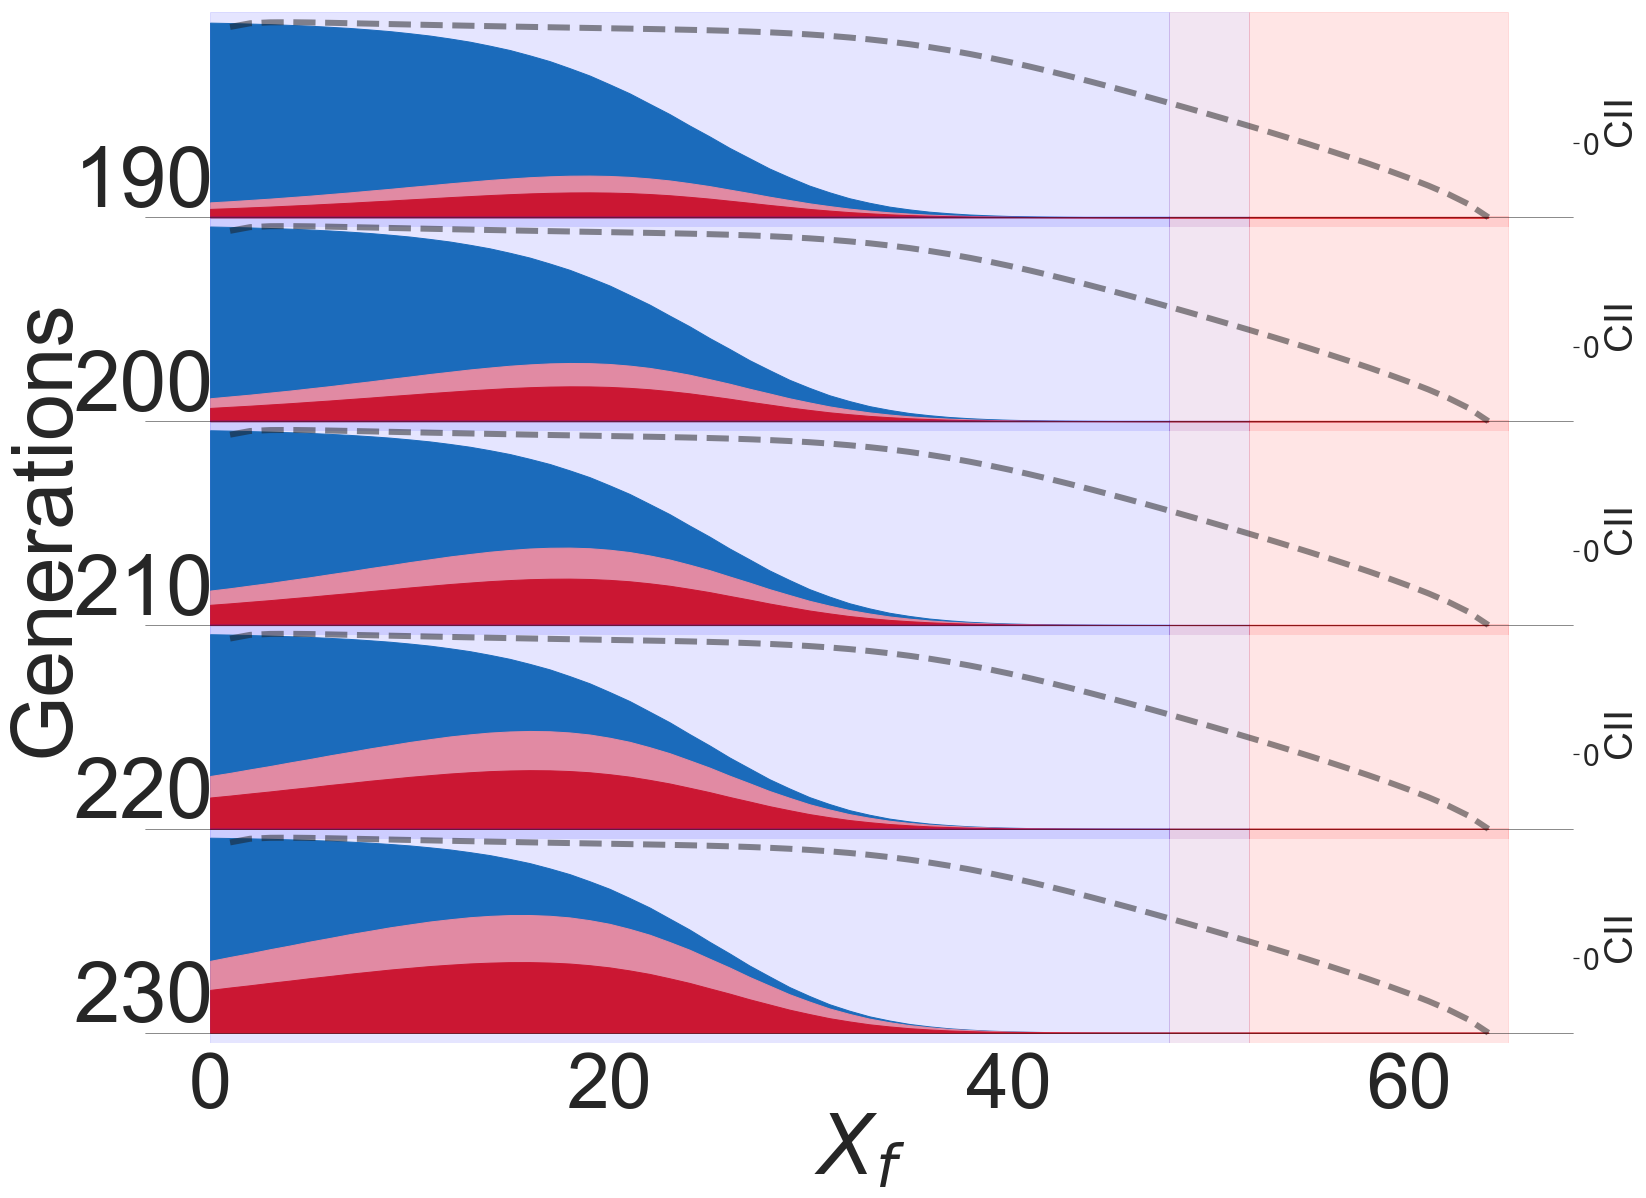

In [82]:
#r_space[(grad(df['x'])<-.001)[0:R]]
#df = df[grad(df['x'])<-.001]


sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)},font_scale=7)

#rep CII
# Initialize the FacetGrid objects

pal = sns.color_palette("Paired",10)
g = sns.FacetGrid(df, row="t",hue= "t" ,aspect=6, height=4 )

g.map(plt.fill_between,"r","x",clip_on=False,color = pal[1], label = 'Wild-type')
g.map(plt.fill_between,"r","xm",clip_on=False,color = pal[4], label = 'Mutant')
g.map(plt.fill_between,"r","xm2",clip_on=False,color = pal[5], label = 'Mutant')

g.map(plt.axvspan,xmin=0, xmax=SSSM, alpha=0.1, color='blue')
g.map(plt.axvspan,xmin=SSSM, xmax=SSWM, alpha=0.1, color='purple')
g.map(plt.axvspan,xmin=SSWM, xmax=L_f, alpha=0.1, color='red')

#g.map(plt.plot,"r","x",clip_on=False,color= 'k')
#g.map(plt.plot,"r","xm",clip_on=False,color= 'k')
#g.map(plt.fill_between,"r","xm2",clip_on=False,color = pal[9], label = 'Double Mutant')
g.map(plt.axhline,y=0,lw=.5,clip_on=False,color='k')


# Define and use a simple function to label the plot in axes coordinates
def label(x,color,label):
    ax = plt.gca()
    ax.text(-.05, .2, int(int(label)/10),
            ha="left", va="center", transform=ax.transAxes)

def facetgrid_two_axes(*args, **kwargs):
    kwargs.pop('color')
    data = kwargs.pop('data')
    dual_axis = kwargs.pop('dual_axis')
    ax = plt.gca()
    alpha = kwargs.pop('alpha', 0.5)
    if dual_axis:
        ax2 = ax.twinx()
        ax2.set_yticks([-1])
        ax2.set_yticklabels(['0'],fontsize=30)
        ax2.set_ylabel('CII',fontsize=40)
        #ax2.axhline(y=0,xmin=0,xmax=fe,color = 'k',alpha=.5)
        


    if dual_axis:
        ax2.plot(data['r'],data['c'],color = 'k', linewidth= 6,**kwargs,alpha=alpha,linestyle='dashed')

    
        
        
g.map_dataframe(facetgrid_two_axes, dual_axis=True)
g.map(label,'x')
#g.map(plt.xlim,xmin=10,xmax=50)
g.fig.subplots_adjust(hspace=-.05)
g.set_titles("")

g.set(yticks=[])
#g.set(xticks=[0,5,10])
g.set_ylabels("")

g.despine(bottom=True, left=True)


ax = g.facet_axis(-3,0)
ax.set_ylabel('Generations',labelpad=60)

ax = g.facet_axis(-1,0)
ax.set_xlabel('$X_{f}$',labelpad=-10)
#ax.text(13,2,'CII',rotation=270)

plt.savefig('CI.pdf')

### CII over parameter space

In [102]:
CIs = []
Ks =np.array([1*10**5,1*10**6,1*10**7,1*10**8])


cs = np.array([.0015,.00275,.00279,.00281])
Ds = M_A(cs,.000035,.0028,1)
alphas = np.array([1.5,3.,4.5,6])
mus = np.array([.000001,.00001,.0001,.001])
rw=.1
for K in range(len(Ks)):
    for D in range(len(Ds)):
        for a in range(len(alphas)):
            for mu in range(len(mus)):

                stand = odeint(standing_wave,[1,-.01],np.linspace(0,99,100),args=(Ds[D],rw))
                L_f = np.where((stand[:,0]*Ks[K])>1)[0][-1]


                rm=rw*alphas[a]
                calc_fix_times = []
                for i in range(L_f):
                    ft = ((2*(L_f-i))/ ( 2*((Ds[D]*rm)**.5))-(2*((Ds[D]*rw)**.5)))
                    calc_fix_times.append(ft)
                            
                s_prob = surf_prob_solve(stand[:,0],rw,rm,Ds[D],.001)
                calc_est_times = 1/np.array(s_prob[:,0][:L_f]*stand[:,0][:L_f]*Ks[K]*mus[mu])
                CII =np.log(calc_fix_times/calc_est_times)
                CIs.append(CII)


/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in true_divide
/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log


In [103]:
CIs = np.array(CIs).reshape(4,4,4,4)

In [104]:
CIs

array([[[[array([        -inf,  -4.18998353,  -3.78089262,  -3.62737155,
        -3.56293082,  -3.53785851,  -3.53189111,  -3.5355979 ,
        -3.54428864,  -3.55554792,  -3.56810602,  -3.58127876,
        -3.5946922 ,  -3.60813199,  -3.62146504,  -3.63460185,
        -3.64747558,  -3.6600308 ,  -3.67221715,  -3.68398459,
        -3.69528791,  -3.70608865,  -3.7163561 ,  -3.72606911,
        -3.73521428,  -3.74379571,  -3.75184185,  -3.7594099 ,
        -3.76658937,  -3.77350505,  -3.78032183,  -3.78725442,
        -3.79457067,  -3.80259147,  -3.81169032,  -3.82229036,
        -3.8348639 ,  -3.84992813,  -3.86802251,  -3.88971829,
        -3.91560694,  -3.94627225,  -3.9823009 ,  -4.02427552,
        -4.07276176,  -4.12831301,  -4.19147076,  -4.26276688,
        -4.34274314,  -4.43194316,  -4.53092826,  -4.64028091,
        -4.76061141,  -4.89255154,  -5.0367482 ,  -5.19384709,
        -5.36447049,  -5.5491847 ,  -5.74846665,  -5.96266741,
        -6.19197589,  -6.43640224,  -6.695765

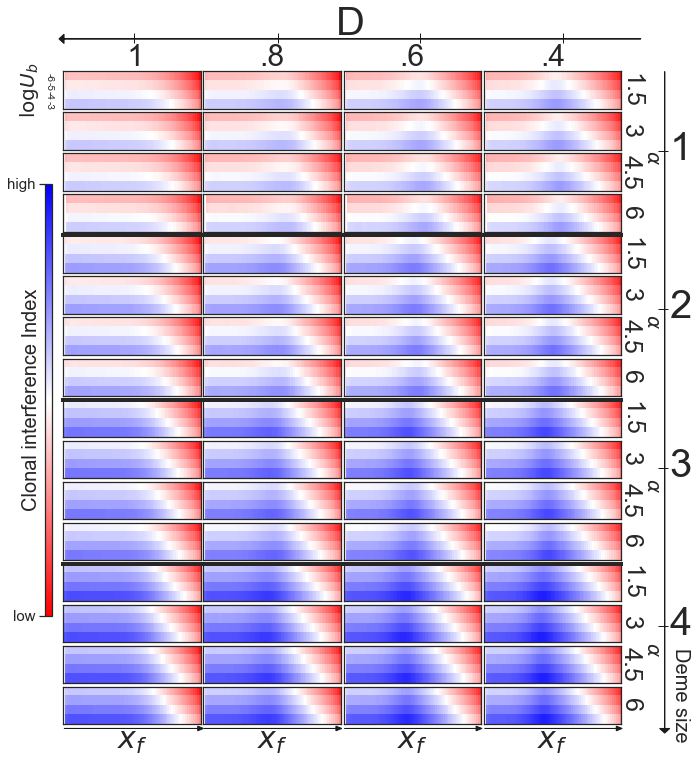

In [136]:
fig, axs = plt.subplots(16,4,figsize=(10,12))

for ax,l,j,k in zip(axs.flat,16*np.array(range(4)).tolist(),np.array([[4*[i] for i in range(4)]*4 for j in range(4)]).flatten(),np.array([[16*[i] for i in range(4)]]*4).flatten()): 
    #print(l,j,k)
    m = ax.imshow(CIs[k,j,l,:].tolist(),vmin=-15,vmax=15,cmap='bwr_r',aspect='auto')
    ax.set_xticks([])
    ax.set_yticks([])
    
    
cbar_ax = fig.add_axes([0.1, 0.25, 0.01, 0.5])
cbar = fig.colorbar(m, cax=cbar_ax,ticks= [-15,15])
cbar.set_label('Clonal interference Index', rotation=90,fontsize=20,labelpad=-30)
cbar_ax.set_yticklabels(['low','high'],fontsize=15)
cbar_ax.yaxis.set_ticks_position('left')

    
plt.subplots_adjust(wspace=.02)
plt.subplots_adjust(hspace=.1)



axs[0,0].set_yticks([0,1,2,3])
axs[0,0].set_yticklabels([-6,-5,-4,-3],fontsize=10,rotation=270)
axs[0,0].set_ylabel(r'$\logU_b$',fontsize=20,rotation=90)


for i in [0,1,2,3]:
    axs[0+4*i,-1].set_ylabel('1.5',fontsize=25,labelpad=-135,rotation=270)
    axs[1+4*i,-1].set_ylabel('3',fontsize=25,labelpad=-135,rotation=270)
    axs[2+4*i,-1].set_ylabel('4.5',fontsize=25,labelpad=-135,rotation=270)
    axs[3+4*i,-1].set_ylabel('6',fontsize=25,labelpad=-135,rotation=270)

    axs[1+4*i,-2].set_ylabel(r'$\alpha$',fontsize=20,rotation=270,labelpad=60)
    axs[1+4*i,-2].yaxis.set_label_coords(2.18, -.2)

axs[0+4*0,-1].set_ylabel('1.5',fontsize=25,labelpad=-135,rotation=270)

axs[0,0].text(160,-4.4,'D',fontsize=40)
axs[0,0].set_title(' 1',fontsize=30)
axs[0,1].set_title('.8',fontsize=30)
axs[0,2].set_title('.6',fontsize=30)
axs[0,3].set_title('.4',fontsize=30)

ax.text(94,-57,1,fontsize=40)
ax.text(94,-40,2,fontsize=40)
ax.text(94,-23,3,fontsize=40)
ax.text(94,-6,4,fontsize=40)

ax.text(95,-3,'Deme size',fontsize=20,rotation=270)

axs[0,0].arrow(354,-.5,0,70.5,head_width =6,head_length= .5,clip_on=False,color = 'k')
axs[0,0].arrow(350,8,6,0,head_width =0,head_length= 0,clip_on=False,color = 'k')
axs[0,0].arrow(350,25,6,0,head_width =0,head_length= 0,clip_on=False,color = 'k')
axs[0,0].arrow(350,42,6,0,head_width =0,head_length= 0,clip_on=False,color = 'k')
axs[0,0].arrow(350,59,6,0,head_width =0,head_length= 0,clip_on=False,color = 'k')

axs[0,0].arrow(340,-4,-340,-0,head_width =1,head_length= 3,clip_on=False,color = 'k')
axs[0,0].arrow(41,-3.6,0,-1,head_width =0,head_length= 0,clip_on=False,color = 'k')
axs[0,0].arrow(126,-3.6,0,-1,head_width =0,head_length= 0,clip_on=False,color = 'k')
axs[0,0].arrow(210,-3.6,0,-1,head_width =0,head_length= 0,clip_on=False,color = 'k')
axs[0,0].arrow(294,-3.6,0,-1,head_width =0,head_length= 0,clip_on=False,color = 'k')

for i in [0,1,2,3,]:
    axs[-1,i].set_xlabel(r'$x_{f}$',fontsize=30)
    
axs[-1,0].arrow(0,4,68,0,head_width=.5,head_length=3,clip_on=False,color = 'k')
axs[-1,1].arrow(0,4,67,0,head_width=.5,head_length=3,clip_on=False,color = 'k')
axs[-1,2].arrow(0,4,67,0,head_width=.5,head_length=3,clip_on=False,color = 'k')
axs[-1,3].arrow(0,4,67,0,head_width=.5,head_length=3,clip_on=False,color = 'k')


for i in[0,1,2,3]:
    for j in range(np.prod(CIs.shape[:2]))[::4][1:]:
        axs[j,i].spines['top'].set_linewidth(4)

#plt.savefig('CII_map.pdf')

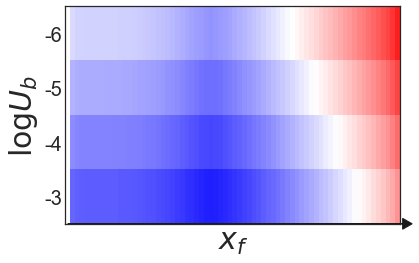

In [140]:
fig, ax = plt.subplots(figsize=(6,4))


m = ax.imshow(CIs[-1,-1,-1,:].tolist(),vmin=-15,vmax=15,cmap='bwr_r',aspect='auto')
ax.set_xticks([])




ax.set_yticks([0,1,2,3])
ax.set_yticklabels([-6,-5,-4,-3],fontsize=20)
ax.set_ylabel(r'$\logU_b$',fontsize=30)
ax.set_xlabel(r'$x_{f}$',fontsize=30)
ax.arrow(0,3.5,70,0,head_width=.2,head_length=2,clip_on=False,color = 'k')

ax.tick_params(axis=u'both', which=u'both',length=0)


plt.subplots_adjust(wspace=.05)
plt.subplots_adjust(hspace=.1)
#plt.tight_layout()

#plt.savefig('CII_inset.pdf')